# Assignment-03

**Author**: Soham Bhattacharya <br>
**Regd.No.**: B2430059 <br>

---------------------------------------------------------------------------------

# Installing required libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# Data Preprocessing

In [3]:
# Define transformation to normalize the images and augment data
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Augmentation: flip images horizontally
    transforms.ToTensor(),              # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
])

In [4]:
# Download and load the CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [5]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [6]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# CIFAR-10 class labels
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# CNN Model

In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # For this dataset, image size is 32*32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(64*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        
        self.fc3 = nn.Linear(84, 10) # For this CIFAR-10 dataset, we have 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Apply Conv2D1 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Apply Conv2D -> ReLU -> Pooling
        x = x.view(-1, 64*5*5)                # Flatten the tensor
        x = F.relu(self.fc1(x))               # Fully connected layer 1 -> ReLU
        x = F.relu(self.fc2(x))               # Fully connected layer 2 -> ReLU
        x = self.fc3(x)                       # Output layer
        return x


# Model Initialization

In [18]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Model Training

In [19]:
train_losses = []
train_accuracies = []
test_accuracies = []

In [20]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    correct=0
    total=0

    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        
        # Track accuracy during training
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f"Epoch [{epoch + 1}, {i + 1}], loss: {running_loss / 2000:.3f}")
            running_loss = 0.0
        
    # For Training accuracies
    avg_loss = running_loss/2000
    train_losses.append(avg_loss)
    train_accuracy = 100*correct/total
    train_accuracies.append(train_accuracy)
    
    # For Test-accuracies
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients for testing
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracies+=[100*correct/total]
    print(f"Accuracy on the test set: {100*correct/total:.2f}%")



Epoch [1, 2000], loss: 2.085
Epoch [1, 4000], loss: 1.696
Epoch [1, 6000], loss: 1.539
Epoch [1, 8000], loss: 1.439
Epoch [1, 10000], loss: 1.380
Epoch [1, 12000], loss: 1.305
Accuracy on the test set: 56.49%
Epoch [2, 2000], loss: 1.222
Epoch [2, 4000], loss: 1.181
Epoch [2, 6000], loss: 1.141
Epoch [2, 8000], loss: 1.133
Epoch [2, 10000], loss: 1.073
Epoch [2, 12000], loss: 1.058
Accuracy on the test set: 65.01%
Epoch [3, 2000], loss: 0.991
Epoch [3, 4000], loss: 0.967
Epoch [3, 6000], loss: 0.933
Epoch [3, 8000], loss: 0.935
Epoch [3, 10000], loss: 0.931
Epoch [3, 12000], loss: 0.918
Accuracy on the test set: 69.16%
Epoch [4, 2000], loss: 0.828
Epoch [4, 4000], loss: 0.835
Epoch [4, 6000], loss: 0.848
Epoch [4, 8000], loss: 0.839
Epoch [4, 10000], loss: 0.838
Epoch [4, 12000], loss: 0.825
Accuracy on the test set: 69.95%
Epoch [5, 2000], loss: 0.753
Epoch [5, 4000], loss: 0.778
Epoch [5, 6000], loss: 0.762
Epoch [5, 8000], loss: 0.773
Epoch [5, 10000], loss: 0.746
Epoch [5, 12000], 

# Plotting Training Accuracies

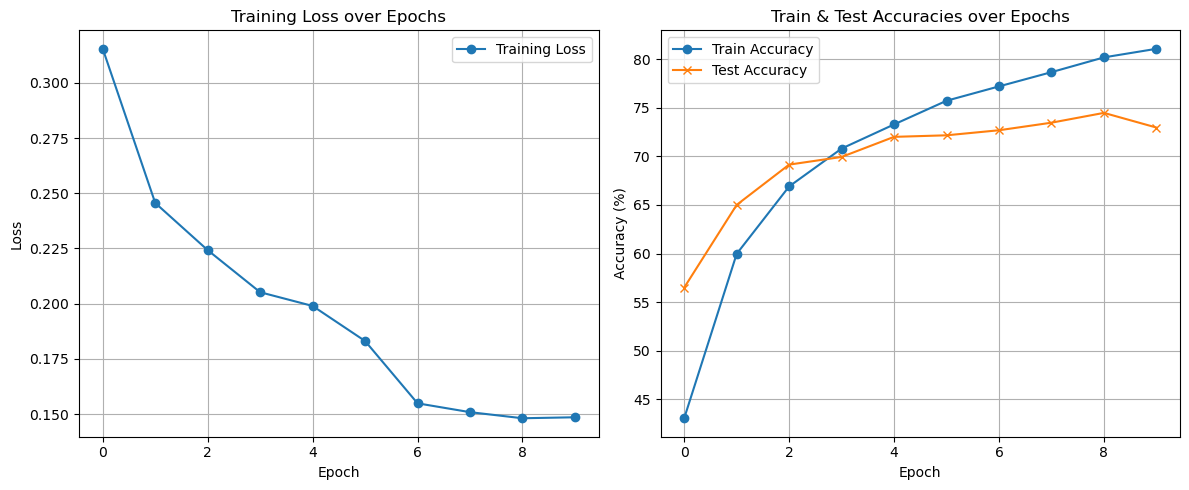

In [28]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train & Test Accuracies over Epochs')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation

In [26]:
# Testing loop
correct = 0
total = 0
with torch.no_grad():  # No need to compute gradients for testing
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {100*correct/total:.2f}%")


Accuracy on the test set: 72.82%


# Predictions

In [38]:
dataiter = iter(testloader)

import warnings
warnings.filterwarnings("ignore", module="matplotlib")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

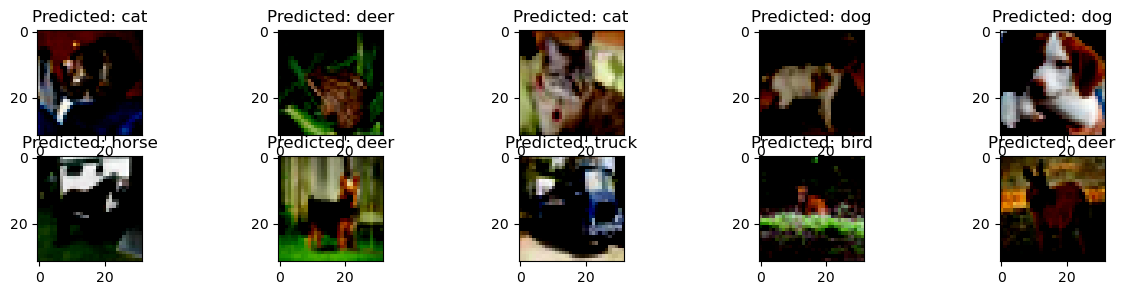

In [39]:
plt.figure(figsize=(15, 3))
r,c,idx=1,1,1

for i in range(10):
    idx=i+1
    
    # Get a random test image and predict its class
    images, labels = next(dataiter)
    output = model(images)
    _, predicted = torch.max(output, 1)

    # Show the image and predicted label
    # plt.figure(figsize=(3,3))
    plt.subplot(2,5,idx)
    plt.imshow(np.transpose(images[0], (1,2,0)))
    # ax[i].imshow()
    plt.title(f'Predicted: {classes[predicted[0]]}')
    
plt.show()

In [37]:
images.shape

torch.Size([4, 3, 32, 32])